In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/rpuri/Downloads/student_math_clean (1).csv")

In [4]:
df.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
#checking for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 student_id               0
school                   0
sex                      0
age                      0
address_type             0
family_size              0
parent_status            0
mother_education         0
father_education         0
mother_job               0
father_job               0
school_choice_reason     0
guardian                 0
travel_time              0
study_time               0
class_failures           0
school_support           0
family_support           0
extra_paid_classes       0
activities               0
nursery_school           0
higher_ed                0
internet_access          0
romantic_relationship    0
family_relationship      0
free_time                0
social                   0
weekday_alcohol          0
weekend_alcohol          0
health                   0
absences                 0
grade_1                  0
grade_2                  0
final_grade              0
dtype: int64


In [6]:
# for handling missing values

# For numerical columns, replace missing values with the mean
numerical_columns = df.select_dtypes(include=np.number).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# For categorical columns, replace missing values with the most frequent value (mode)
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [7]:
#One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [8]:
# Verify that there are no missing values after handling them
missing_values_after_handling = df_encoded.isnull().sum()
print("Missing values after handling:\n", missing_values_after_handling)

Missing values after handling:
 student_id                   0
age                          0
class_failures               0
family_relationship          0
free_time                    0
                            ..
higher_ed_yes                0
internet_access_no           0
internet_access_yes          0
romantic_relationship_no     0
romantic_relationship_yes    0
Length: 74, dtype: int64


In [9]:
# Select features and target variable
features = df_encoded.drop(['student_id', 'final_grade'], axis=1)
target = df_encoded['final_grade']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
# Initialize models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

In [12]:
#train models
linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [13]:
# Make predictions
linear_reg_pred = linear_reg_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)

In [14]:
# Evaluate models
def evaluate_model(model, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'Model: {model.__class__.__name__}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')
    print('\n')

In [15]:
# Evaluate linear regression model
evaluate_model(linear_reg_model, y_test, linear_reg_pred)

Model: LinearRegression
Mean Squared Error: 8.98
R-squared: 0.56




In [16]:
# Evaluate decision tree model
evaluate_model(decision_tree_model, y_test, decision_tree_pred)

Model: DecisionTreeRegressor
Mean Squared Error: 6.68
R-squared: 0.67




In [17]:
# Evaluate random forest model
evaluate_model(random_forest_model, y_test, random_forest_pred)

Model: RandomForestRegressor
Mean Squared Error: 3.85
R-squared: 0.81




In [18]:
# Evaluate gradient boosting model
evaluate_model(gradient_boosting_model, y_test, gradient_boosting_pred)

Model: GradientBoostingRegressor
Mean Squared Error: 3.91
R-squared: 0.81




In [19]:
# Compare actual vs. predicted values
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

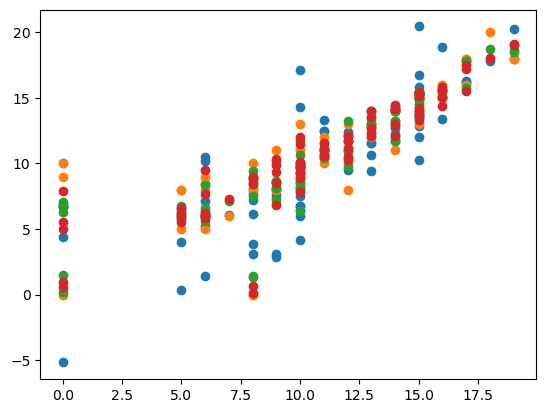

In [20]:
# Scatter plot for Linear Regression
plt.scatter(y_test, linear_reg_pred, label='Linear Regression')

# Scatter plot for Decision Tree
plt.scatter(y_test, decision_tree_pred, label='Decision Tree')

# Scatter plot for Random Forest
plt.scatter(y_test, random_forest_pred, label='Random Forest')

# Scatter plot for Gradient Boosting
plt.scatter(y_test, gradient_boosting_pred, label='Gradient Boosting')

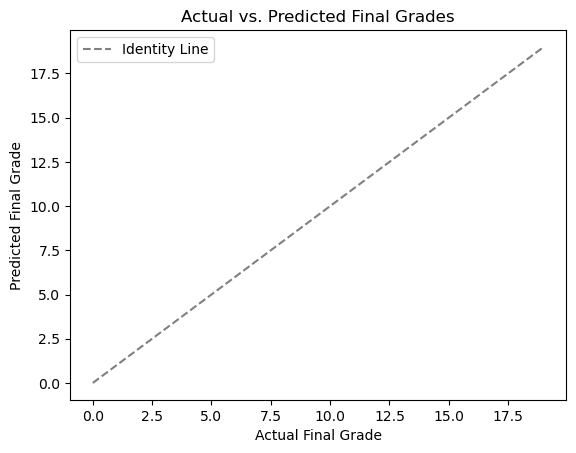

In [21]:
# Line of identity (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Identity Line')

plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('Actual vs. Predicted Final Grades')
plt.legend()
plt.show()